In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Generate custom dataset
X, y = datasets.make_blobs(n_samples=1000,
                            centers=2,
                            n_features=2,
                            random_state=1,
                            cluster_std=3)


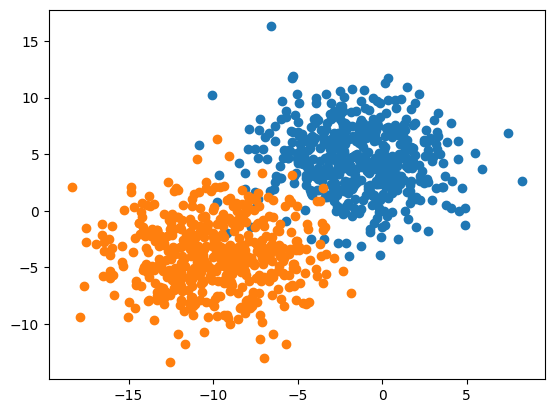

In [2]:

for class_value in range(2):

    row_ix = np.where(y == class_value)

    plt.scatter(X[row_ix, 0], X[row_ix, 1])

plt.show()

In [11]:
model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %.3f' % accuracy)


Accuracy: 0.972


In [12]:
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min2, max2 = X[:, 0].min() - 1, X[:, 0].max() + 1

In [13]:
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)


In [14]:
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

In [15]:
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_grid.reshape((len(x_g), 1)), y_grid.reshape((len(y_g), 1))

In [16]:
grid = np.hstack((x_g, y_g))

In [17]:
y_pred_2 = model.predict(grid)

p_pred = model.predict_proba(grid)

p_pred = p_pred[:, 0]

p_pred.shape
pp_grid = p_pred.reshape(x_grid.shape)


/var/folders/ql/mxgwmlkx4hs6xmnsy7mz2vph0000gn/T/ipykernel_69814/265126557.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix,0], X[row_ix, 1], cmap="Pastel1")


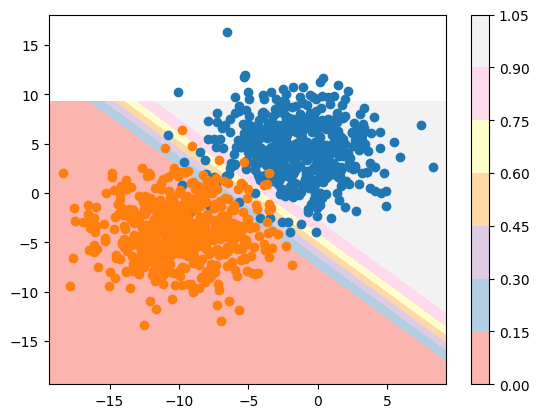

In [18]:
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)

for class_value in range(2):
    row_ix = np.where(y == class_value)

    plt.scatter(X[row_ix,0], X[row_ix, 1], cmap="Pastel1")
plt.show()

In [25]:
dataset = pd.read_csv('/Users/femiadebimpe/terminal-cpu/data/yo_train.tsv', sep='\t', header=0) 

In [26]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
                                                X, y,
                                                test_size=0.25,
                                                random_state=0)

In [27]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'yo_train_05387'